In [18]:
import datetime as dt
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
from define.randchans import RandomUnitary
from define.QECCLfid import minwt as mw
from define import qcode as qc
from define import fnames as fn
from define import globalvars as gv
import matplotlib
matplotlib.use("Agg")
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
qcode = qc.QuantumErrorCorrectingCode("Steane")
qc.Load(qcode)

In [ ]:
mu = np.mean(qcode.weightdist[qcode.PauliCorrectableIndices])/2
np.random.normal(mu,0.5)

In [ ]:
# plt.plot(np.arange(8),poisson.pmf(np.arange(8), 0),0.1**np.arange(10),marker="o",linestyle="None")

In [ ]:
# probs = poisson.pmf(qcode.weightdist, np.abs(np.random.normal(mu,mu/3)))
# plt.plot(np.sort(qcode.weightdist), probs[np.argsort(qcode.weightdist)],marker="o",linestyle="None")
# plt.plot(np.sort(qcode.weightdist), (1/7)**np.sort(qcode.weightdist),marker="x",linestyle="None")
# plt.yscale('log')

In [ ]:
errdist = RandomPauliChannel({"method":1, "mu":mu, "weightdist":qcode.weightdist})

In [ ]:
infid = 0.2
errdist[0] = 1 - infid
errdist[1:] = infid * errdist[1:]/np.sum(errdist[1:])

In [ ]:
errdist

In [ ]:
PauliDistributionPlot(errdist, qcode, nreps=5, max_weight=3)

In [ ]:
for w in range(np.max(qcode.weightdist)+1):
    print("Total probability of weight {} errors = {}:\n{}".format(w, np.sum(errdist[qcode.weightdist==w]), errdist[qcode.weightdist==w]))

In [ ]:
import numpy as np
from define import qcode as qc
from define.QECCLfid import uncorrectable as uc
from analyze.plots import PauliDistributionPlot

In [ ]:
qcode = qc.QuantumErrorCorrectingCode("Steane")
qc.Load(qcode)
qc.PrepareSyndromeLookUp(qcode)

In [ ]:
q1 = 0.8; q2 = 0.2; infid = 0.1; n = qcode.N
single_qubit_errors = np.array([1 - infid, infid/3, infid/3, infid/3], dtype=np.double)

In [ ]:
iid_error_dist = uc.GetErrorProbabilities(qcode.PauliOperatorsLST, single_qubit_errors, 0)
full_process_infid = 1 - iid_error_dist[0]
print("Sum of IID error probabilities = {}, Infidelity = {}.".format(np.sum(iid_error_dist), full_process_infid))

In [ ]:
n_two_qubit_errors = np.int(0.1 * qcode.group_by_weight[2].size)
two_qubit_errors = np.random.choice(qcode.group_by_weight[2], size=n_two_qubit_errors)

In [ ]:
corr_error_dist = np.zeros(iid_error_dist.size, dtype=np.double)
corr_error_dist[two_qubit_errors] = np.abs(np.random.normal(0.1 * 4**n * full_process_infid, 0.1 * 4**n * full_process_infid, size=(n_two_qubit_errors,)))
corr_error_dist[0] = 1 - full_process_infid
corr_error_dist[two_qubit_errors] = full_process_infid * corr_error_dist[two_qubit_errors]/np.sum(corr_error_dist[two_qubit_errors])
corr_error_dist = corr_error_dist/np.sum(corr_error_dist)

In [ ]:
print("Sum of CORR error probabilities = {}, Infidelity = {}".format(np.sum(corr_error_dist), 1-corr_error_dist[0]))

In [ ]:
pauli_error_dist = q1 * iid_error_dist + q2 * corr_error_dist

In [ ]:
PauliDistributionPlot(qcode, pauli_error_dist, nreps=5, max_weight=3,outdir="./../../temp/", channel="linear_sum")

In [ ]:
chi_from_file = np.load("/Users/pavi/Documents/chbank/20_05_2020_11_07_46/physical/raw_up_6.5.npy")[1,:].reshape([4,4])

In [ ]:
chi_from_file

In [ ]:
ptm_from_file = np.load("/Users/pavi/Documents/chbank/20_05_2020_11_07_46/physical/up_6.5.npy")[1,:].reshape([4,4])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def normalization(p, n, g):
    return (1 + g*p + np.power(p,3)/(1-p)*(1-np.power(p,n-2)))

In [38]:
nq = 7
g = 0.1
p = 0.1
corr_probs = [(1-p)/normalization(1-p, nq, g)] + [p/normalization(p, nq, g), g*p/normalization(p, nq, g)] + [np.power(p,k)/normalization(p, nq, g) for k in range(3,nq+1)]

In [39]:
iid_probs = [np.power(1-p,nq)] + [np.power(p,k)*np.power(1-p, nq-k) for k in range(1, nq+1)]

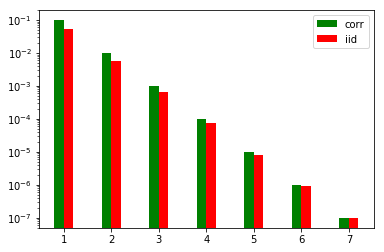

In [40]:
#fig = plt.figure()
X = np.arange(nq+1)
plt.bar(X[1:]-0.1, corr_probs[1:], color="g", width=0.2, align="center", label="corr")
plt.bar(X[1:]+0.1, iid_probs[1:], color="r", width=0.2, align="center", label= "iid")
plt.yscale("log")
plt.legend(loc=0)
plt.show()

In [ ]:
def normalization_agm(p, n):
    return 1 - p - (np.power(p, n+1)*(n+1) - p - n * np.power(p, n+2))/np.power(1-p, 2)

In [ ]:
corr_probs_agm = [(1-p)/normalization_agm(1-p, nq)] + [np.power(p,k)/normalization_agm(p, nq) for k in range(1,nq+1)]

In [ ]:
#fig = plt.figure()
X = np.arange(nq+1)
plt.bar(X-0.1, corr_probs_agm, color="g", width=0.2, align="center", label="corr")
plt.bar(X+0.1, iid_probs, color="r", width=0.2, align="center", label= "iid")
plt.yscale("log")
plt.legend(loc=0)
plt.show()

In [ ]:
def normalization_gm(p, n):
    return (1+p/(1-p)*(1-np.power(p,n)))

In [4]:
import numpy as np
from define.QECCLfid.ptm import get_Pauli_tensor
from define.QECCLfid.utils import Kron
from define import globalvars as gv
from define import qcode as qc

In [5]:
qcode = qc.QuantumErrorCorrectingCode("Steane")
qc.Load(qcode)

In [17]:
L = [1,1,3,2,1]
np.allclose(get_Pauli_tensor(L).reshape(2**len(L),2**len(L)), Kron(*gv.Pauli[L]))

True

In [27]:
nstabs = 64
nlogs = 4
# nstabs * nlogs
qc.GetOperatorsForTLSIndex(qcode, range(64, 66))

array([[0, 0, 0, 0, 1, 1, 1],
       [3, 0, 3, 0, 2, 1, 2]])

In [28]:
qc.GenerateGroup(qcode.L)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 3, 3],
       [0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 2, 2, 2]], dtype=int8)

In [29]:
qcode.L

array([[0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 3, 3, 3]], dtype=int8)

In [30]:
qcode.S

array([[1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 1],
       [3, 3, 3, 3, 0, 0, 0],
       [3, 3, 0, 0, 3, 3, 0],
       [3, 0, 3, 0, 3, 0, 3]], dtype=int8)

In [23]:
import numpy as np
from scipy import linalg as linalg
def HermitianConjugate(A):
    return A.conj().T

In [26]:
nq = 4
dim = 8**nq
prox = 0.1
M = np.random.standard_normal(size=(dim, dim)) + 1j * np.random.standard_normal(size=(dim, dim))
H = (M + M.conj().T) / np.longdouble(2)
U = linalg.expm(1j * prox * H)

In [24]:
def StineToKraus(U):
    # Compute the Krauss operators for the input quantum channel, which is represented in the Stinespring dialation
    # The Krauss operator T_k is given by: <a|T_k|b> = <a e_k|U|b e_0> , where {|e_i>} is a basis for the environment and |a>, |b> are basis vectors of the system
    # Note that a k-qubit channel needs to be generated from a unitary matrix on 3*k qubits where 2*k qubits represent the environment.
    nq = int(np.log2(U.shape[0]))//3
    environment = np.eye(4**nq)[:,:,np.newaxis]
    system = np.eye(2**nq)[:,:,np.newaxis]
    krauss = np.zeros((4**nq, 2**nq, 2**nq), dtype=np.complex128)
    for ki in range(4**nq):
        ## The Krauss operator T_k is given by: <a|T_k|b> = <a e_k|U|b e_0>.
        for ri in range(2**nq):
            for ci in range(2**nq):
                leftProduct = HermitianConjugate(
                    np.dot(
                        U, np.kron(system[ri, :, :], environment[ki, :, :])
                    )
                )
                krauss[ki, ri, ci] = np.dot(
                    leftProduct, np.kron(system[ci, :, :], environment[0, :, :])
                )[0, 0]
    return krauss

In [ ]:
# # Constants:
# #     K -- cutoff length = 3
# """
# 1. Sample k from the Poisson distribution with mean = 1. If k is larger than K, sample again.
# 2. Given a k, choose a random subset of {1, 2, ..., qcode.N} of size k.
# 3. Generate Kraus operators for a k-qubit quantum channel and assign the supports from the random subset chosen above.
# 4. We form a dictionary with supports and the respective Kraus operators, and give it to multi_qubit_kraus.
# """
# def get_kraus_poisson():
    
    


In [61]:
def get_kraus_poisson(rotation_angle, qcode, n_maps = 3):
    r"""
    Sub-routine to prepare the dictionary for error eps = sum of cptp maps
    Generates kraus by using stine to kraus
    of random multi-qubit unitary operators rotated by rotation_angle/2**|support|
    Probability associated with each weight-k error scales exponentially p_error^k (except weights <= w_thresh)
    Input :
    rotation_angle = the angle to rotate the Stinespring unitary by
    qcode = QEC
    n_maps = number of maps to be considered for the sum
    Returns :
    dict[key] = (support,krauslist)
    where key = number associated to the operation applied (not significant)
    support = tuple describing which qubits the kraus ops act on
    krauslist = krauss ops acting on support
    """
    kraus_dict = {}
    prob_maps = np.array([1/n_maps]*n_maps) # Probabilites associated to the above CPTP maps
    cutoff_q = 3 # Cutoff number of qubits for poissson distribution

    cptp_map_count = 0
    for __ in range(n_maps):
        #  while(n_q > cutoff_q):
        #         n_q = SampleFromPoisson()
        n_q = 1    # to be commented later
        support = tuple(sorted((random.sample(range(qcode.N), n_q))))
        if n_q == 0:
            rand_unitary = 1.0
            kraus_dict[cptp_map_count] = (support,[rand_unitary])
        else:
            rand_unitary = RandomUnitary(
                rotation_angle/(2**(3*n_q)), 2**(3*n_q), method="exp"
            )
            kraus_dict[cptp_map_count] = (support, StineToKraus(rand_unitary))
        cptp_map_count += 1
    
    # Multiplying kraus by their respective probabilities
    for key, (support, krauslist) in kraus_dict.items():
        for k in range(len(krauslist)):
            # print("k = {}".format(k))
            kraus_dict[key][1][k] *= np.sqrt(prob_maps[key])
    return kraus_dict


In [62]:
dict_k = get_kraus_poisson(0.1, qcode)

In [63]:
dict_k[0][1].shape

(4, 2, 2)

In [64]:
dict_k

{0: ((4,),
  array([[[ 9.98983372e-01-0.0328988j ,  2.20766071e-02+0.00413275j],
          [-2.18311160e-02+0.00526454j,  9.99400532e-01-0.00798583j]],
  
         [[-1.02591328e-02-0.00710005j,  4.93201904e-03-0.01705683j],
          [ 8.73226516e-03-0.00271041j, -1.11625083e-02-0.00256835j]],
  
         [[ 1.26280428e-03+0.00671055j, -1.14683060e-02-0.00126667j],
          [-1.93040356e-04+0.00234006j,  4.55240072e-03+0.00387257j]],
  
         [[ 9.89629885e-04-0.00031732j, -5.74167953e-06+0.00338131j],
          [ 4.75283391e-03-0.01142412j, -1.25318066e-04+0.00189513j]]]))}